In [2]:
##########################################################################
#Features selection for machine learning models to predict stock movement
#
#########################################################################

import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import os
import numpy as np
import tensorflow as tf 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

In [3]:
#read spy&500 technical indicators data and add a prefic s_ to each column name.
file_path="./retrieveData/data"
spy = = pd.read_csv(os.path.join(file_path,"spy.csv"))
spy.head()
spyi=spy[['date','adj_close', 'sma', 'rsi', 'slowd',
       'slowk', 'roc', 'willr', 'std', 'mom', 'adx', 'obv', 'atr', 'cci',
       'macd', 'trix']]
spyidx=spyi.add_prefix('s_')
spyidx.head()

,s_date,s_adj_close,s_sma,s_rsi,s_slowd,s_slowk,s_roc,s_willr,s_std,s_mom,s_adx,s_obv,s_atr,s_cci,s_macd,s_trix
0,2010-07-09,88.2266,106.3943,50.6201,73.0817,98.4491,-3.3742,-43.4134,4.18525,-3.77,31.8911,2.712688e+09,2.1703,31.2417,-1.4158,-0.2092
1,2010-07-12,88.2838,106.1529,50.8352,90.3016,98.1965,-3.0338,-35.9331,3.71105,-3.38,30.3314,2.843649e+09,2.0931,49.0562,-1.1685,-0.1989
2,2010-07-13,89.6158,106.1593,55.6767,97.8217,96.8195,0.0821,-4.7991,3.72450,0.09,28.4013,3.056193e+09,2.0907,106.0754,-0.8314,-0.1811
3,2010-07-14,89.6077,106.1893,55.6405,96.1264,93.3633,0.3845,-4.9107,3.78325,0.42,26.5727,2.871863e+09,2.0285,103.6809,-0.5586,-0.1588
4,2010-07-15,89.6322,106.3507,55.7335,93.4406,90.1390,2.1039,-4.5759,3.99615,2.26,24.8394,3.103545e+09,2.0186,89.5847,-0.3362,-0.1343


In [4]:
#read a company daily stock prices and technical indicators
ticker='KO'
data = pd.read_csv(os.path.join(file_path,f"{ticker}.csv"))
data.head()

,Unnamed: 0,ticker,date,open,high,low,close,volume,dividend,split,...,std,mom,adx,obv,atr,cci,macd,trix,next_close,direction
0,0,KO,2010-07-09,52.36,52.49,52.07,52.40,6474000,0.0,1.0,...,1.48560,0.09,22.9753,233789100.0,0.8664,77.0709,-0.1867,-0.0959,52.45,1.0
1,1,KO,2010-07-12,52.16,52.47,51.95,52.45,5385300,0.0,1.0,...,1.48160,-0.03,21.3439,239174400.0,0.8416,78.4183,-0.0861,-0.0809,52.72,1.0
2,2,KO,2010-07-13,52.74,52.95,52.60,52.72,6853200,0.0,1.0,...,1.51865,0.26,20.4375,246027600.0,0.8172,112.6781,0.0152,-0.0626,52.82,1.0
3,3,KO,2010-07-14,52.56,52.92,52.42,52.82,6196300,0.0,1.0,...,1.59280,0.58,19.3374,252223900.0,0.7946,103.5467,0.1025,-0.0425,52.85,1.0
4,4,KO,2010-07-15,52.72,52.95,52.32,52.85,7485300,0.0,1.0,...,1.69290,1.05,18.1694,259709200.0,0.7828,92.7632,0.1720,-0.0220,52.37,-1.0


In [14]:
# merge two datasets
mixDt=pd.concat([data,spyidx],axis=1)
mixDt['day']=mixDt.index
mixDt=mixDt.iloc[:-1]
mixDt.columns

Index(['Unnamed: 0', 'ticker', 'date', 'open', 'high', 'low', 'close',
       'volume', 'dividend', 'split', 'adj_close', 'sma', 'rsi', 'slowd',
       'slowk', 'roc', 'willr', 'std', 'mom', 'adx', 'obv', 'atr', 'cci',
       'macd', 'trix', 'next_close', 'direction', 's_date', 's_adj_close',
       's_sma', 's_rsi', 's_slowd', 's_slowk', 's_roc', 's_willr', 's_std',
       's_mom', 's_adx', 's_obv', 's_atr', 's_cci', 's_macd', 's_trix', 'day'],
      dtype='object')

In [15]:
#create future close price for next 3,7,10,14 days
mixDt['next3']=mixDt['close'].shift(-3)
mixDt['next7']=mixDt['close'].shift(-7)
mixDt['next10']=mixDt['close'].shift(-10)
mixDt['next14']=mixDt['close'].shift(-14)
mixDt=mixDt.iloc[:-14]

In [ ]:
#create future close price direction for next3 days
mixDt.loc[(mixDt['next3']-mixDt['close']) >0, 'direction3'] = '1' 
mixDt.loc[(mixDt['next3']-mixDt['close']) <=0, 'direction3'] = '0' 
mixDt['direction3']=mixDt['direction3'].astype(int)

In [16]:
#create future close price direction for next7 days
mixDt.loc[(mixDt['next7']-mixDt['close']) >0, 'direction7'] = '1' 
mixDt.loc[(mixDt['next7']-mixDt['close']) <=0, 'direction7'] = '0' 
mixDt['direction7']=mixDt['direction7'].astype(int)

In [17]:
#create future close price direction for next14 days
mixDt.loc[(mixDt['next14']-mixDt['close']) >0, 'direction14'] = '1' 
mixDt.loc[(mixDt['next14']-mixDt['close']) <=0, 'direction14'] = '0' 
mixDt['direction14']=mixDt['direction14'].astype(int)

In [18]:
#create future close price direction for next10 days
mixDt.loc[(mixDt['next10']-mixDt['close']) >0, 'direction10'] = '1' 
mixDt.loc[(mixDt['next10']-mixDt['close']) <=0, 'direction10'] = '0' 
mixDt['direction10']=mixDt['direction10'].astype(int)

In [20]:
#check any NA values in any column
mixDt.isnull().sum()

Unnamed: 0     0
ticker         0
date           0
open           0
high           0
low            0
close          0
volume         0
dividend       0
split          0
adj_close      0
sma            0
rsi            0
slowd          0
slowk          0
roc            0
willr          0
std            0
mom            0
adx            0
obv            0
atr            0
cci            0
macd           0
trix           0
next_close     0
direction      0
s_date         0
s_adj_close    0
s_sma          0
s_rsi          0
s_slowd        0
s_slowk        0
s_roc          0
s_willr        0
s_std          0
s_mom          0
s_adx          0
s_obv          0
s_atr          0
s_cci          0
s_macd         0
s_trix         0
day            0
next3          0
next7          0
next10         0
next14         0
direction7     0
direction14    0
direction10    0
dtype: int64

In [21]:
#check which colums with begative values
mixDt.min()

Unnamed: 0               0
ticker                  KO
date            2010-07-09
open                 35.88
high                 36.28
low                  35.58
close                35.97
volume             2447423
dividend                 0
split                    1
adj_close          19.1931
sma                36.6736
rsi                 8.3237
slowd               1.4318
slowk                   -0
roc                -52.862
willr                 -100
std                 0.1603
mom                 -42.72
adx                 7.5074
obv            2.33789e+08
atr                 0.3175
cci               -466.667
macd              -10.9051
trix               -2.4384
next_close           35.97
direction               -1
s_date          2010-07-09
s_adj_close        85.9956
s_sma              106.153
s_rsi              16.7009
s_slowd             2.8484
s_slowk             1.6746
s_roc             -25.9763
s_willr               -100
s_std               0.4472
s_mom               -85.37
s

In [22]:
#create list of features, and output target 
target_column = ['direction7'] 
predictors = ['open', 'high', 'low', 'close',
       'volume', 'adj_close', 'sma', 'rsi', 'slowd',
       'slowk', 'roc', 'willr', 'std', 'mom', 'adx', 'obv', 'atr', 'cci',
       'macd', 'trix', 's_adj_close',
       's_sma', 's_rsi', 's_slowd', 's_slowk', 's_roc', 's_willr', 's_std',
       's_mom', 's_adx', 's_obv', 's_atr', 's_cci', 's_macd', 's_trix', 'day']
non_NegF= ['open', 'high', 'low', 'close',
       'volume', 'dividend', 'split', 'adj_close', 'sma', 'rsi', 'slowd',
       'slowk', 'std', 'adx', 'obv', 'atr',  's_adj_close',
       's_sma', 's_rsi', 's_slowd', 's_slowk', 's_std',
        's_adx', 's_obv', 's_atr', 'day']

In [23]:
#create input X 1 for  feature selection process using chi2, logistic regression,Extremely Randomized Trees method
X1 = mixDt[non_NegF].values
X2=mixDt[predictors].values
Y = mixDt[target_column].values


In [24]:
# Import the necessary libraries first
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [25]:
# Feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X1, Y)

# Summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)

features = fit.transform(X1)
# Summarize selected features
print(features[0:5,:])

[2.902e+00 2.713e+00 2.890e+00 2.508e+00 7.000e+06 5.666e-01 5.365e-04
 3.044e+01 1.853e+00 4.443e+01 1.105e+02 1.497e+02 4.953e+01 1.169e+01
 1.369e+09 1.158e+00 1.001e+02 8.620e+01 1.487e+01 2.280e+01 2.744e+01
 2.739e+00 3.914e+01 8.088e+09 3.520e+00 1.841e+03]
[[6.474e+06 2.338e+08 2.713e+09 0.000e+00]
 [5.385e+06 2.392e+08 2.844e+09 1.000e+00]
 [6.853e+06 2.460e+08 3.056e+09 2.000e+00]
 [6.196e+06 2.522e+08 2.872e+09 3.000e+00]
 [7.485e+06 2.597e+08 3.104e+09 4.000e+00]]


In [27]:
# Import your necessary dependencies
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [28]:
# Feature extraction
model = LogisticRegression()
rfe = RFE(model,20)
fit = rfe.fit(X2, Y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

Num Features: 20
Selected Features: [ True  True  True  True  True False  True  True False False False  True
 False False False  True False  True False False  True  True  True  True
  True False  True False False  True  True False  True False False  True]
Feature Ranking: [ 1  1  1  1  1  4  1  1 10  6  7  1  8 14  3  1 17  1 16 15  1  1  1  1
  1  5  1 11  2  1  1 12  1  9 13  1]


/Users/jadetao/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jadetao/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jadetao/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jadetao/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jadetao/opt/anaconda3/lib/python3.7/site-packages/skle

In [65]:
# Feature Importance with Extra Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier

# Building the model 
extra_tree_forest = ExtraTreesClassifier(n_estimators = 36, 
                                        criterion ='entropy', max_features = 8) 
  
# Training the model 
extra_tree_forest.fit(X2, Y) 
  
# Computing the importance of each feature 
feature_importance = extra_tree_forest.feature_importances_ 
  
# Normalizing the individual importances 
feature_importance_normalized = np.std([tree.feature_importances_ for tree in 
                                        extra_tree_forest.estimators_], 
                                        axis = 0) 

/Users/jadetao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [67]:
X2=mixDt[predictors]

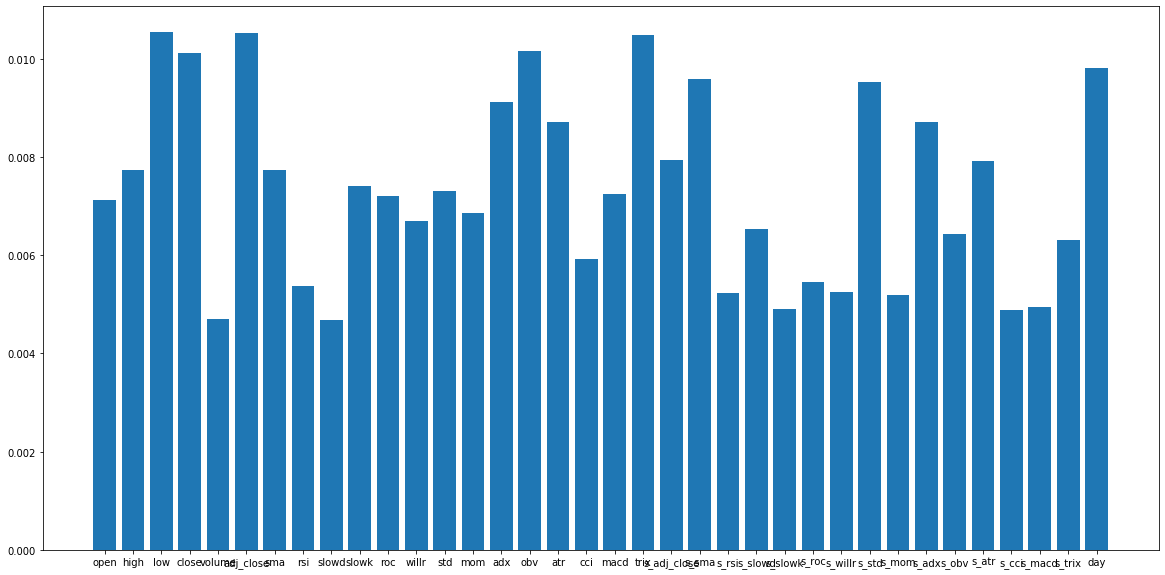

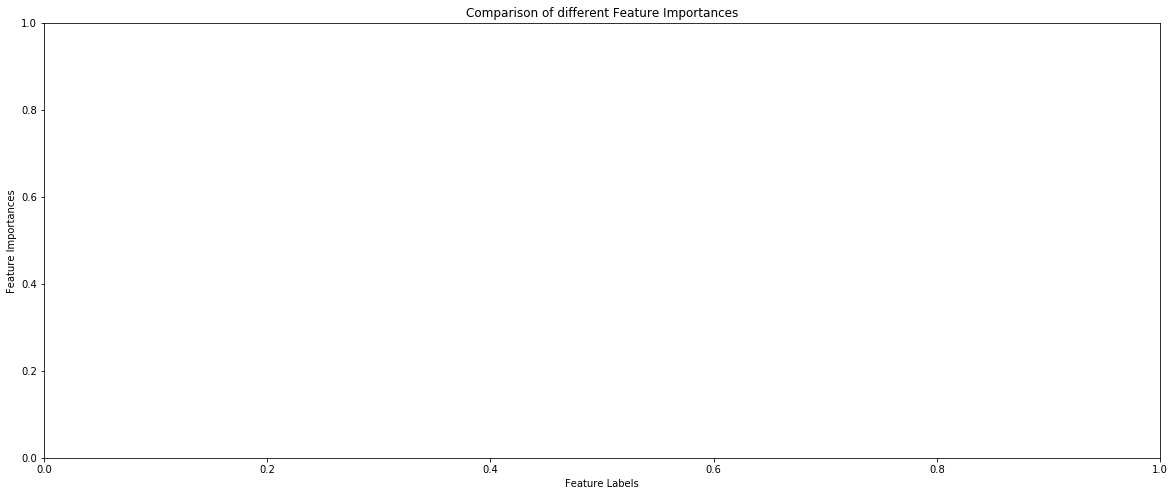

In [68]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
# Plotting a Bar Graph to compare the models 
plt.bar(X2.columns, feature_importance_normalized) 
plt.figure(figsize=(20,8))
plt.xlabel('Feature Labels') 
plt.ylabel('Feature Importances') 
plt.title('Comparison of different Feature Importances') 
plt.show() 